<a href="https://colab.research.google.com/github/pri-souza22/Desafio_Transfer_learning_DIO/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [3]:
caminho_dataset = '/content/drive/MyDrive/primeiro-desafio-dio'

In [4]:
datagem = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

dado_treino = datagem.flow_from_directory(
    caminho_dataset,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


dados_validacao = datagem.flow_from_directory(
    caminho_dataset,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 614 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


In [5]:
base_modelo= MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_modelo.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
modelo = models.Sequential([
    base_modelo,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

In [7]:
modelo.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [8]:
historico = modelo.fit(
    dado_treino,
    epochs=5,
    validation_data=dados_validacao
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.6745 - loss: 0.6497 - val_accuracy: 0.9542 - val_loss: 0.2317
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9295 - loss: 0.2404 - val_accuracy: 0.9673 - val_loss: 0.1223
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9596 - loss: 0.1439 - val_accuracy: 0.9673 - val_loss: 0.0982
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9719 - loss: 0.1010 - val_accuracy: 0.9673 - val_loss: 0.0783
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9655 - loss: 0.1025 - val_accuracy: 0.9739 - val_loss: 0.0670


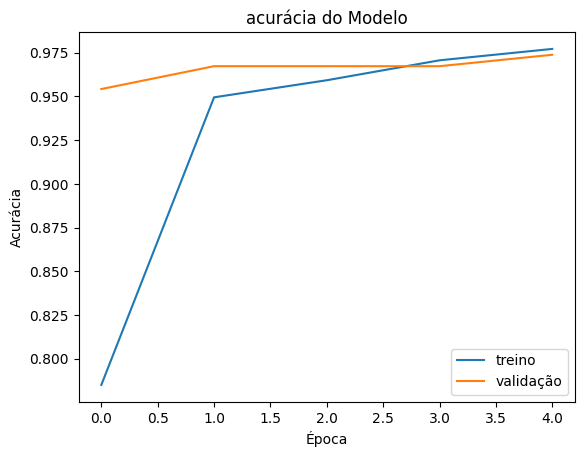

In [9]:
plt.plot(historico.history['accuracy'], label='treino')
plt.plot(historico.history['val_accuracy'], label='validação')
plt.title('acurácia do Modelo')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np

imagem_teste = '/content/drive/MyDrive/20241021_154230.jpg'

img= image.load_img(imagem_teste, target_size=(224,224))
img_array = image.img_to_array(img)/ 255.0
img_array = np.expand_dims(img_array, axis=0)


previsao = modelo.predict(img_array)


if previsao[0] < 0.5:
  print("Classe prevista: ", list(dado_treino.class_indices.keys())[0])
else:
  print("Classe prevista: ",list(dado_treino.class_indices.keys())[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Classe prevista:  Gato


In [13]:
modelo.save("meu_modelo.keras")